#Time Series forecast Total Goods Sold

##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

##Load Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('Case Study - Transaction.csv')
print(df)

     TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0          TR11369         328  2022-01-01        P3   7500    4        30000   
1          TR16356         165  2022-01-01        P9  10000    7        70000   
2           TR1984         183  2022-01-01        P1   8800    4        35200   
3          TR35256         160  2022-01-01        P1   8800    7        61600   
4          TR41231         386  2022-01-01        P9  10000    1        10000   
...            ...         ...         ...       ...    ...  ...          ...   
5015       TR54423         243  2022-12-31       P10  15000    5        75000   
5016        TR5604         271  2022-12-31        P2   3200    4        12800   
5017       TR81224          52  2022-12-31        P7   9400    6        56400   
5018       TR85016          18  2022-12-31        P8  16000    3        48000   
5019       TR85684          55  2022-12-31        P8  16000    1        16000   

      StoreID  
0          

In [ ]:
#removing unnamed Column
df = df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1)
print(df)

     TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0          TR11369         328  2022-01-01        P3   7500    4        30000   
1          TR16356         165  2022-01-01        P9  10000    7        70000   
2           TR1984         183  2022-01-01        P1   8800    4        35200   
3          TR35256         160  2022-01-01        P1   8800    7        61600   
4          TR41231         386  2022-01-01        P9  10000    1        10000   
...            ...         ...         ...       ...    ...  ...          ...   
5015       TR54423         243  2022-12-31       P10  15000    5        75000   
5016        TR5604         271  2022-12-31        P2   3200    4        12800   
5017       TR81224          52  2022-12-31        P7   9400    6        56400   
5018       TR85016          18  2022-12-31        P8  16000    3        48000   
5019       TR85684          55  2022-12-31        P8  16000    1        16000   

      StoreID  
0          

In [ ]:
#Selecting used Column
df[['Date', 'Qty']]
print(df)

     TransactionID  CustomerID        Date ProductID  Price  Qty  TotalAmount  \
0          TR11369         328  2022-01-01        P3   7500    4        30000   
1          TR16356         165  2022-01-01        P9  10000    7        70000   
2           TR1984         183  2022-01-01        P1   8800    4        35200   
3          TR35256         160  2022-01-01        P1   8800    7        61600   
4          TR41231         386  2022-01-01        P9  10000    1        10000   
...            ...         ...         ...       ...    ...  ...          ...   
5015       TR54423         243  2022-12-31       P10  15000    5        75000   
5016        TR5604         271  2022-12-31        P2   3200    4        12800   
5017       TR81224          52  2022-12-31        P7   9400    6        56400   
5018       TR85016          18  2022-12-31        P8  16000    3        48000   
5019       TR85684          55  2022-12-31        P8  16000    1        16000   

      StoreID  
0          

##Creating aggregate daily transaction

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
daily_quantity = df.groupby(df['Date'].dt.date)['Qty'].sum().reset_index()

# To display the results in the console
print(daily_quantity)

           Date  Qty
0    2022-01-01   49
1    2022-01-02   59
2    2022-01-03   63
3    2022-01-04   45
4    2022-01-05   30
..          ...  ...
360  2022-12-27   70
361  2022-12-28   68
362  2022-12-29   42
363  2022-12-30   44
364  2022-12-31   37

[365 rows x 2 columns]


In [ ]:
# To save the results to a new CSV file
daily_quantity.to_csv('daily_quantity_aggregated.csv', index=False)

##Stasionarity Check

<Axes: >

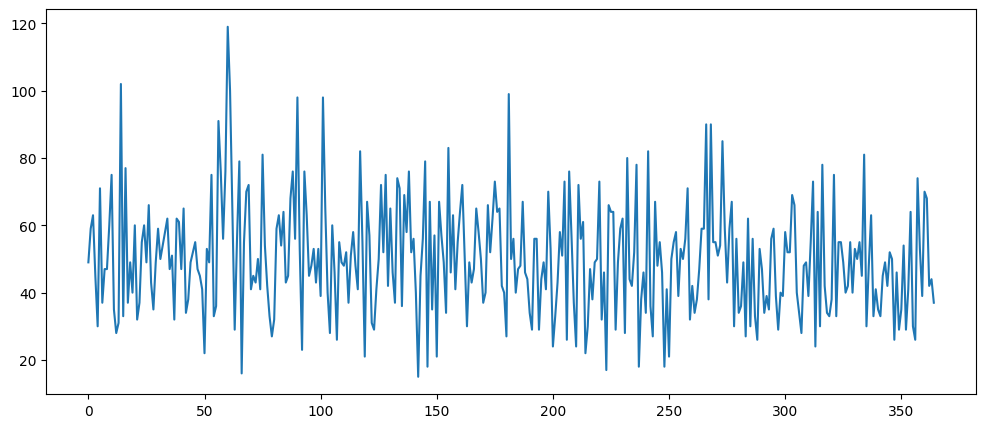

In [ ]:
df = pd.read_csv('daily_quantity_aggregated.csv')
df['Qty'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['Qty'])

1. ADF :  -19.448086319449082
2. P-Value :  0.0
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 364
5. Critical Values :
	 1% :  -3.4484434475193777
	 5% :  -2.869513170510808
	 10% :  -2.571017574266393


##Figure Out Order for ARIMA Model

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['Qty'],
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(4, 1, 1)   Log Likelihood               -1540.871
Date:                Sat, 02 Sep 2023   AIC                           3093.741
Time:                        11:11:52   BIC                           3117.124
Sample:                             0   HQIC                          3103.035
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0347      0.048     -0.726      0.468      -0.128       0.059
ar.L2         -0.0180      0.052     -0.344      0.731      -0.120       0.084
ar.L3         -0.0300      0.051     -0.586      0.558      -0.130       0.070
ar.L4          0.0882      0.051      1.728      0.084      -0.012       0.188
ma.L1         -0.9861      0.013    -78.424      0.000      -1.011      -0.961
sigma2       275.4756     20.047     13.741      0.000     236.183     314.768
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.90
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             0.54
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

##Split Data into Training and Testing


In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(365, 2)
(335, 2) (30, 2)
Date    2022-12-02
Qty             30
Name: 335, dtype: object Date    2022-12-31
Qty             37
Name: 364, dtype: object


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Qty'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  335
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -1418.803
Date:                Sat, 02 Sep 2023   AIC                           2853.607
Time:                        11:11:54   BIC                           2884.120
Sample:                             0   HQIC                          2865.771
                                - 335                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.6536      0.985     51.430      0.000      48.723      52.584
ar.L1         -0.6866      0.493     -1.394      0.163      -1.652       0.279
ma.L1          0.6701      0.487      1.375      0.169      -0.285       1.625
ma.L2         -0.0216      0.060     -0.359      0.720      -0.140       0.096
ma.L3         -0.0588      0.065     -0.902      0.367      -0.187       0.069
ma.L4          0.0678      0.068      1.000      0.317      -0.065       0.201
ma.L5          0.0247      0.091      0.273      0.785      -0.153       0.203
sigma2       279.3273     21.356     13.079      0.000     237.470     321.185
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                22.18
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                             0.55
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2022-01-01',end='2022-12-31')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
print(pred)

335    49.433554
336    51.310393
337    48.288109
338    54.167864
339    48.965929
340    51.812399
341    49.858022
342    51.199891
343    50.278568
344    50.911145
345    50.476820
346    50.775026
347    50.570279
348    50.710858
349    50.614337
350    50.680608
351    50.635106
352    50.666347
353    50.644897
354    50.659625
355    50.649513
356    50.656456
357    50.651689
358    50.654962
359    50.652715
360    50.654257
361    50.653198
362    50.653925
363    50.653426
364    50.653769
Name: ARIMA predictions, dtype: float64


##Future Date Prediction

<Axes: >

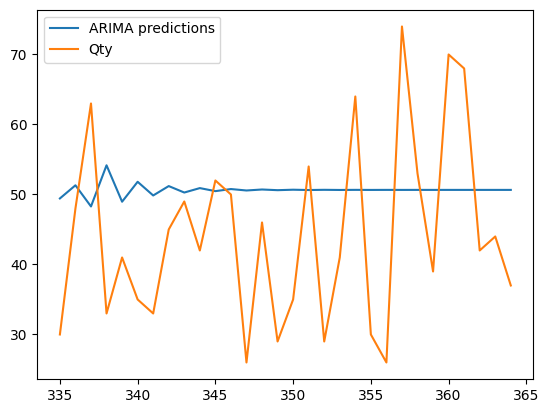

In [ ]:
#pred.index=index_future_dates
pred.plot(legend=True)
test['Qty'].plot(legend=True)

In [ ]:
test['Qty'].mean()

44.266666666666666

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Qty']))
print(rmse)

14.830225633273317


In [ ]:
model2=ARIMA(df['Qty'],order=(1,0,5))
model2=model2.fit()
df.tail()

,Date,Qty
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44
364,2022-12-31,37


In [ ]:
#prediction for 30 days
index_future_dates=pd.date_range(start='2022-12-31',end='2023-01-30')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2022-12-31    50.889443
2023-01-01    49.667818
2023-01-02    50.278500
2023-01-03    48.678788
2023-01-04    50.977678
2023-01-05    49.595497
2023-01-06    50.465977
2023-01-07    49.917760
2023-01-08    50.263020
2023-01-09    50.045580
2023-01-10    50.182521
2023-01-11    50.096277
2023-01-12    50.150592
2023-01-13    50.116385
2023-01-14    50.137928
2023-01-15    50.124361
2023-01-16    50.132906
2023-01-17    50.127524
2023-01-18    50.130913
2023-01-19    50.128779
2023-01-20    50.130123
2023-01-21    50.129277
2023-01-22    50.129810
2023-01-23    50.129474
2023-01-24    50.129685
2023-01-25    50.129552
2023-01-26    50.129636
2023-01-27    50.129583
2023-01-28    50.129617
2023-01-29    50.129596
2023-01-30    50.129609
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

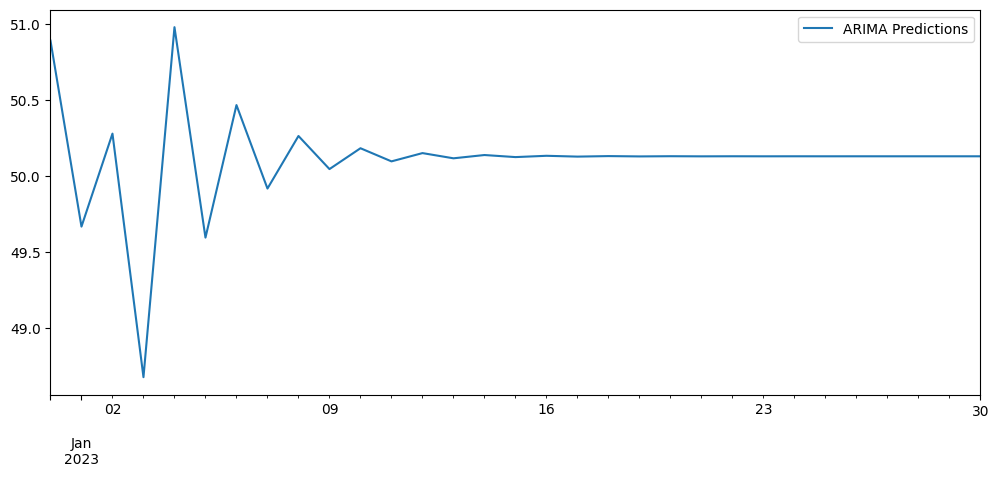

In [ ]:
pred.plot(figsize=(12,5),legend=True)

# Clustering of Consumer Data (K-Means)


##Agregation of Product Sold and Costumer Dataset (Data Preparation)

In [4]:
import pandas as pd

# Load the first dataset (transactions dataset)
df_transactions = pd.read_csv('Case Study - Transaction.csv')  # Replace with the actual file path

# Load the second dataset (customer dataset)
df_customers = pd.read_csv('Case Study - Customer.csv')  # Replace with the actual file path

# Merge the two datasets on the common column 'CustomerID'
merged_df = df_transactions.merge(df_customers, on='CustomerID', how='inner')

# Calculate the number of transactions per customer using groupby and count
transactions_per_customer = merged_df.groupby('CustomerID')['TransactionID'].count().reset_index()

# Rename the count column to 'TransactionCount'
transactions_per_customer.rename(columns={'TransactionID': 'TransactionCount'}, inplace=True)

# Calculate the total Qty and TotalAmount per customer using groupby and sum
total_qty_per_customer = merged_df.groupby('CustomerID')['Qty'].sum().reset_index()
total_amount_per_customer = merged_df.groupby('CustomerID')['TotalAmount'].sum().reset_index()

# Rename the sum columns
total_qty_per_customer.rename(columns={'Qty': 'TotalQty'}, inplace=True)
total_amount_per_customer.rename(columns={'TotalAmount': 'TotalAmountSum'}, inplace=True)

# Merge the transaction count, total Qty, and total TotalAmount back to the customer dataset
merged_with_counts = df_customers.merge(transactions_per_customer, on='CustomerID', how='left')
merged_with_counts = merged_with_counts.merge(total_qty_per_customer, on='CustomerID', how='left')
merged_with_counts = merged_with_counts.merge(total_amount_per_customer, on='CustomerID', how='left')

# Fill any NaN values in the merged dataset with 0 (if needed)
merged_with_counts.fillna(0, inplace=True)

# Now, merged_with_counts contains CustomerID along with transaction count, total Qty, and total TotalAmount per customer.

# To save the merged dataset with counts and totals to a new CSV file:
merged_with_counts.to_csv('merged_dataset_with_counts_and_totals.csv', index=False)  # Replace with the desired file path

# To inspect the first few rows of the merged dataset with counts and totals:
print(merged_with_counts.head())


   CustomerID  Age  Gender Marital Status  Income  TransactionCount  TotalQty  \
0           1   55       1        Married       5                17        60   
1           2   60       1        Married       6                13        57   
2           3   32       1        Married       9                15        56   
3           4   31       1        Married       4                10        46   
4           5   58       1        Married       3                 7        27   

   TotalAmountSum  
0          623300  
1          392300  
2          446200  
3          302500  
4          268600  


##Import Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [5]:
# Load the dataset
df= data = pd.read_csv('merged_dataset_with_counts_and_totals.csv')  # Replace 'your_dataset.csv' with the actual file path
print(df)

     CustomerID  Age  Gender Marital Status  Income  TransactionCount  \
0             1   55       1        Married       5                17   
1             2   60       1        Married       6                13   
2             3   32       1        Married       9                15   
3             4   31       1        Married       4                10   
4             5   58       1        Married       3                 7   
..          ...  ...     ...            ...     ...               ...   
442         443   33       1              0       9                16   
443         444   53       0        Married      15                18   
444         445   51       0        Married      14                18   
445         446   57       0        Married       7                11   
446         447   54       1        Married      20                13   

     TotalQty  TotalAmountSum  
0          60          623300  
1          57          392300  
2          56          4462

##Data Exploration

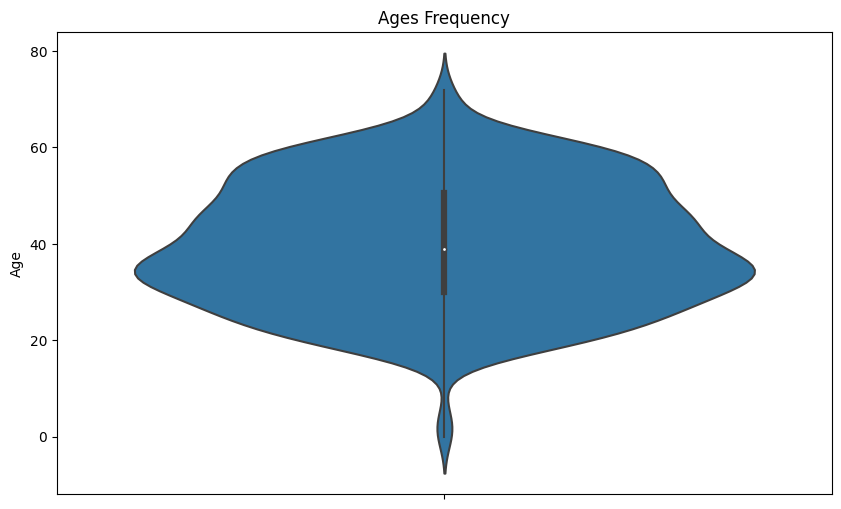

In [6]:
#Costumer Average Age
df.drop(["CustomerID"], axis = 1, inplace=True)

plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

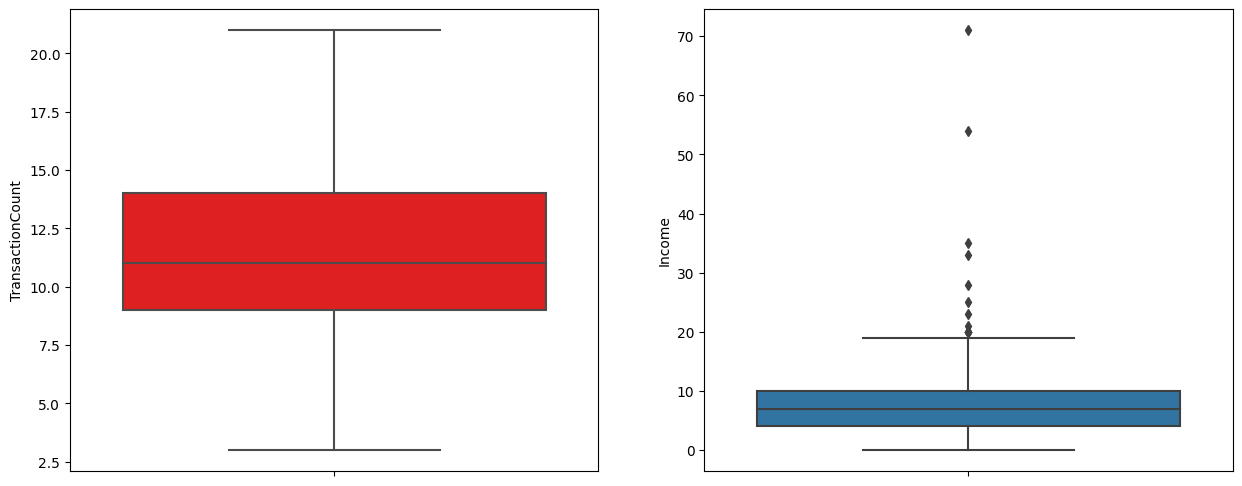

In [7]:
#Costumer Average Income and Transaction Count
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["TransactionCount"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Income"])
plt.show()

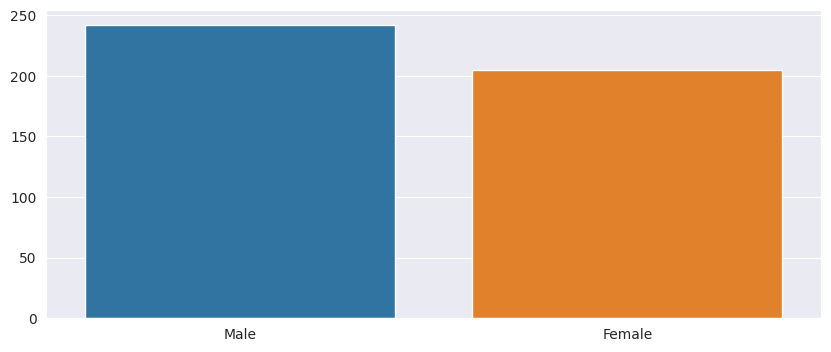

In [8]:
#Costumer Gender
Gender = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=Gender.index, y=Gender.values)
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

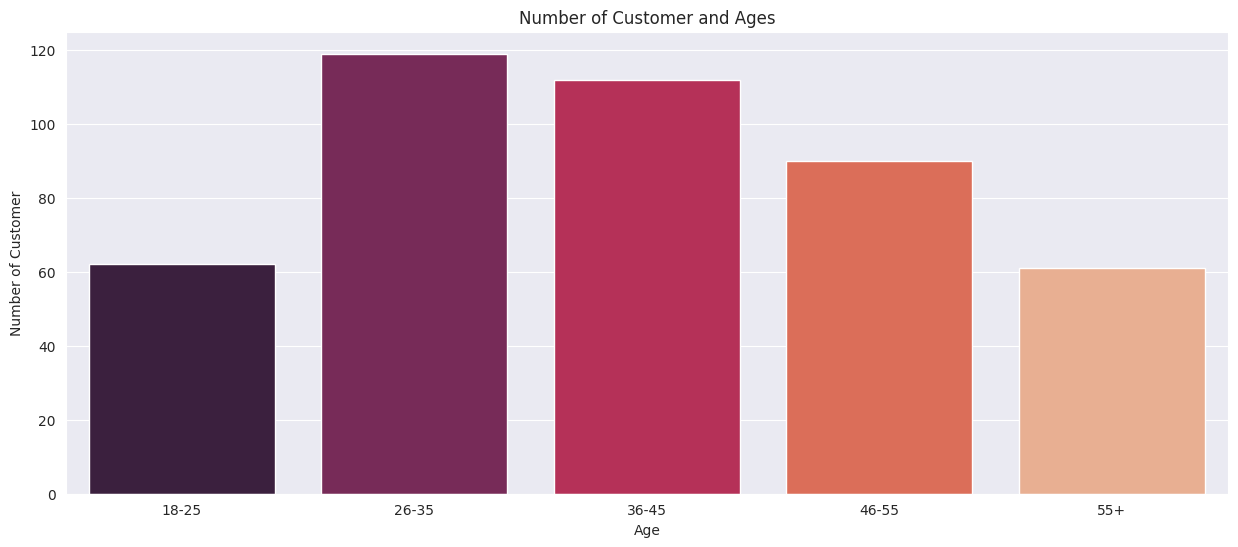

In [9]:
#Costumer Age Gap
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

##Calculating Optimal Number of Cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

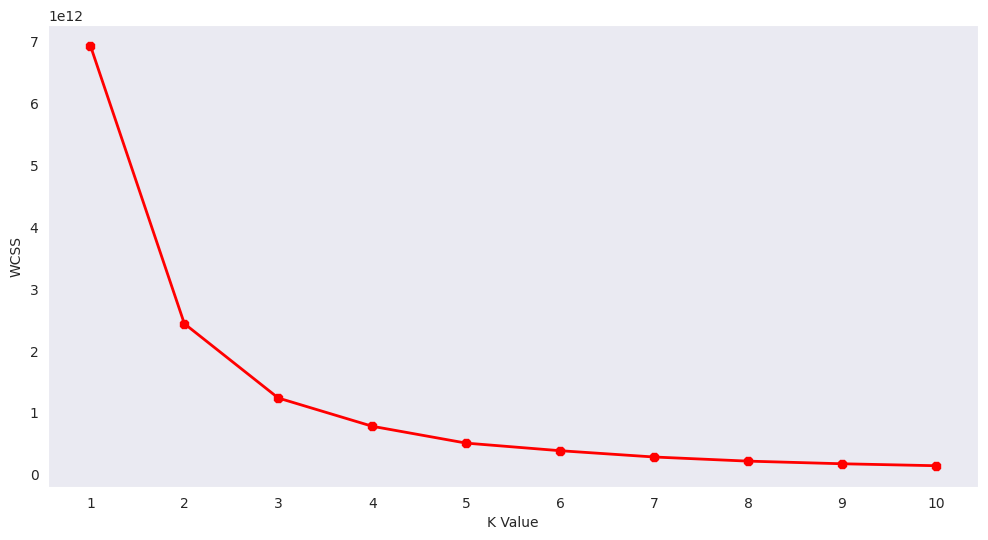

In [10]:
# Determine the optimal number of clusters using the Elbow Method
df.drop(["Marital Status"], axis = 1, inplace=True)
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [11]:
# Plot the Elbow Method graph

km = KMeans(n_clusters=3)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#Visualization of Clustering

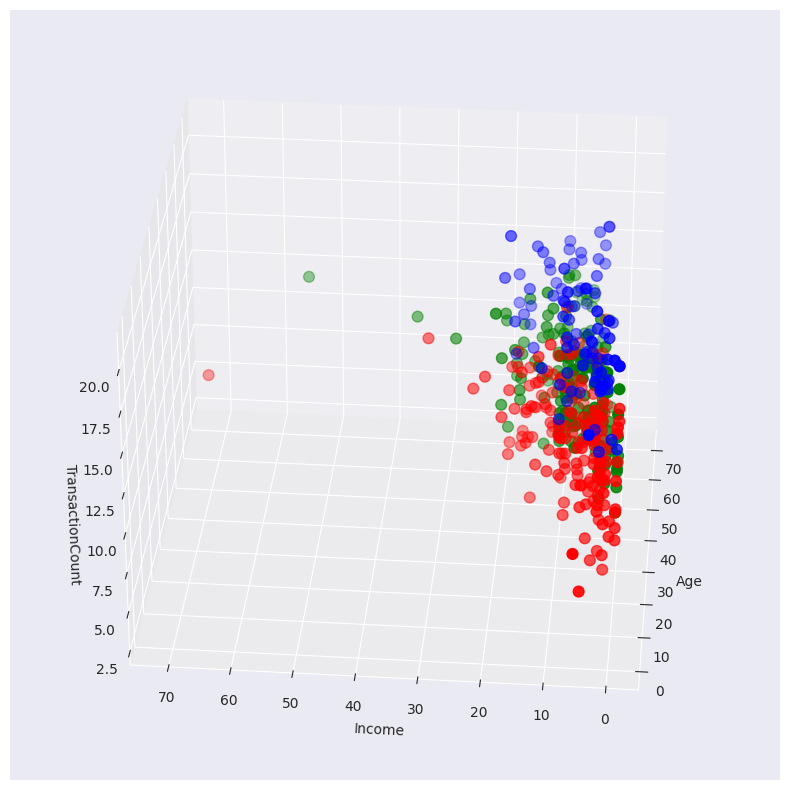

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Income"][df.label == 0], df["TransactionCount"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Income"][df.label == 1], df["TransactionCount"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Income"][df.label == 2], df["TransactionCount"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Income"][df.label == 3], df["TransactionCount"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Income"][df.label == 4], df["TransactionCount"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('TransactionCount')
plt.show()

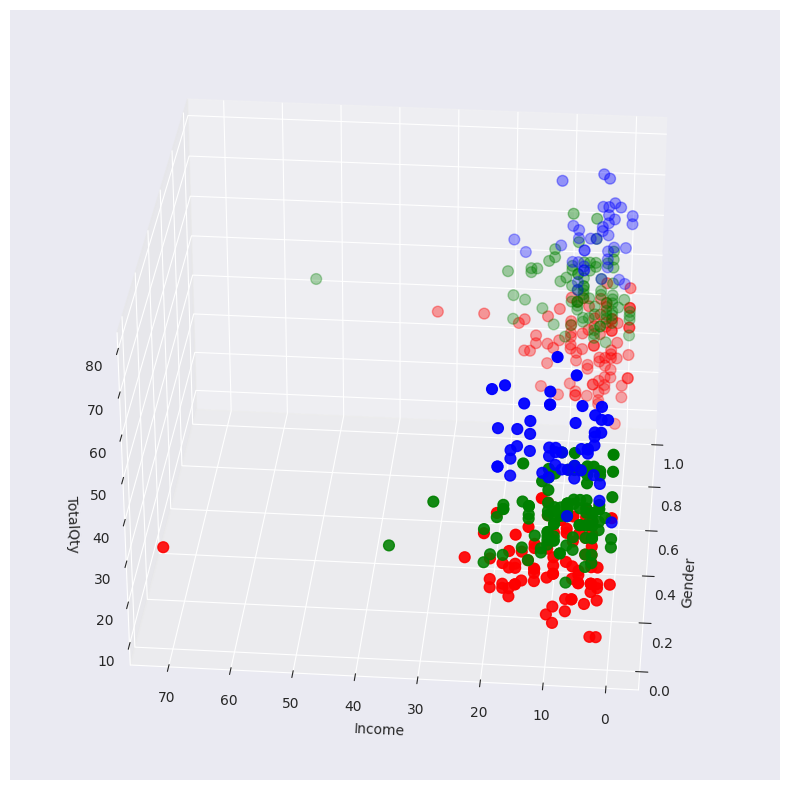

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Gender[df.label == 0], df["Income"][df.label == 0], df["TotalQty"][df.label == 0], c='blue', s=60)
ax.scatter(df.Gender[df.label == 1], df["Income"][df.label == 1], df["TotalQty"][df.label == 1], c='red', s=60)
ax.scatter(df.Gender[df.label == 2], df["Income"][df.label == 2], df["TotalQty"][df.label == 2], c='green', s=60)
ax.scatter(df.Gender[df.label == 3], df["Income"][df.label == 3], df["TotalQty"][df.label == 3], c='orange', s=60)
ax.scatter(df.Gender[df.label == 4], df["Income"][df.label == 4], df["TotalQty"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Gender")
plt.ylabel("Income")
ax.set_zlabel('TotalQty')
plt.show()

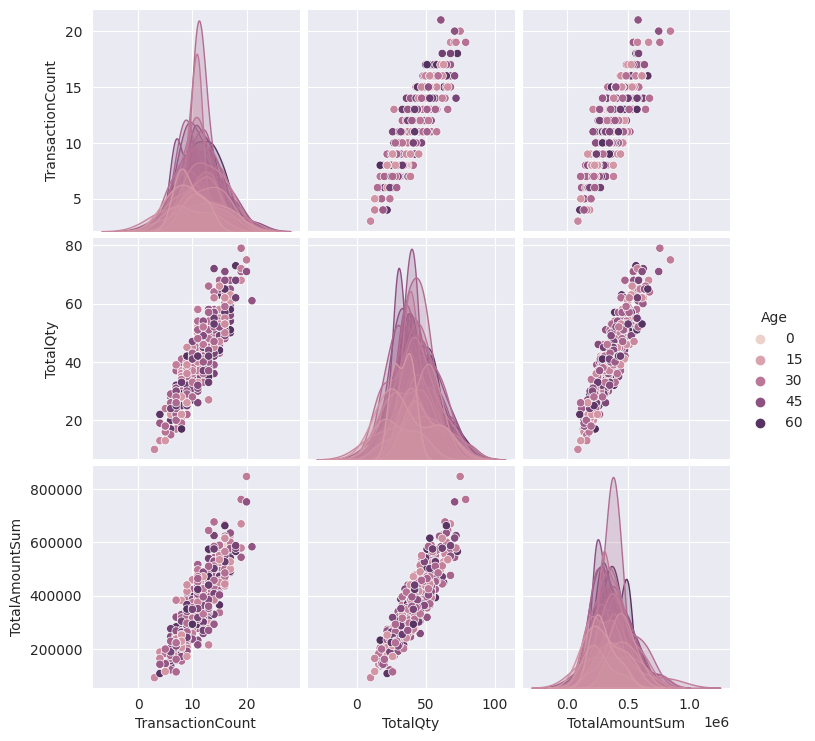

In [15]:
sns.pairplot(df, vars = ['TransactionCount', 'TotalQty', 'TotalAmountSum'], hue = "Age")